In [1]:
from docplex.mp.model import Model
import numpy as np
from plot import plot_tsp
from scipy.spatial.distance import cdist

In [2]:
num_cities = 100

V = list(range(num_cities))
E = [(i, j) for i in V for j in V if i != j]

X = np.random.default_rng(0).random((len(V), 2))

# compute euclidean distance matrix
c = cdist(X, X)
c.shape

(100, 100)

In [6]:
model = Model('TSP_MTZ')

x = model.binary_var_dict(E, name='x')
u = model.integer_var_dict(V[1:], name='u')

# add in and out degree constraints
model.add_constraints(model.sum(x[i, j] for i in V if i != j) == 1 for j in V)
model.add_constraints(model.sum(x[i, j] for j in V if i != j) == 1 for i in V)

# add lazy subtour elimination constraints
model.add_constraints(u[i] - u[j] + (len(V) - 1) * x[i, j] <= len(V) - 2
                      for i in V[1:] for j in V[1:] if i != j)

# objective function
model.minimize(model.sum(c[i, j] * x[i, j] for i in V for j in V if i != j))

# solve the model
solution = model.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 9902 rows, 9999 columns, and 48906 nonzeros.
Reduced MIP has 9900 binaries, 99 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (21.91 ticks)
Probing time = 0.01 sec. (5.93 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 9902 rows, 9999 columns, and 48906 nonzeros.
Reduced MIP has 9900 binaries, 99 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (30.59 ticks)
Probing time = 0.01 sec. (5.91 ticks)
Clique table members: 2600.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.01 sec. (22.50 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0        6.1778   211      

Tour cost: 7.871863269322995


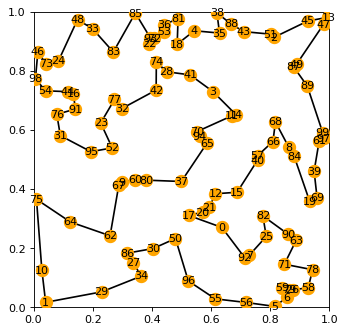

In [7]:
sol_edges = list(solution.get_value_dict(x, keep_zeros=False).keys())

print(f'Tour cost: {solution.objective_value}')
plot_tsp(X, sol_edges)